# 𝕋𝕒𝕓𝕦 𝕤𝕖𝕒𝕣𝕔𝕙 𝕗𝕠𝕣 𝕘𝕣𝕒𝕡𝕙 𝕕𝕣𝕒𝕨𝕚𝕟𝕘
* Hierarchical Graph Drawing
* Drawing Graphs: Sugiyama framework
* Metaheuristic / Optimisation: Tabu Search (TB), Genetic Algorithm (GA), Simulated Annealing (SA) 


Other links:
* an evolutionary algorithm toolbox written in python: https://github.com/stromatolith/peabox/tree/master
* Metaheuristic Optimization framewoRK
* Gurobi Optimisation

# Tabu

## Simple short term tabu search

In [ ]:
max_iter = 100
x_best = 0
for in in range(max_iter):
    compute_candidate_list() # CL
    compute_neighbourhood() # N
    select_best_solution()
    x = perform_move()
    if x > x_best:
        x_best = x
    update_tabu_status
    
    

## Tabu
* https://github.com/edgarsmdn/TS/tree/master

In [6]:
import numpy as np
import random as rnd

import numpy as np
import random as rnd
'''

               Utilities for Stochastic Optimization Algorithms

'''
def LS_f_v3(f, p_init, max_iter, bounds, radius, reduce_iter, reduce_frac):
    '''
    ---------------------
    LOCAL SEARCH ALGORITHM
    ---------------------
    --- input ---
    f: (function) Objective function
    p_init: (array) Initial point (where the funtion is going to be evaluated)
    max_iter: (integer) Maximum number of iterations
    bounds: (list) Bounds on the search domain
    radius: (float) Initial search radius
    reduce_iter: (integer) Number of iterations with the same optimum that will induce a search radius reduction
    reduce_frac: (float) Fraction to which the search radius is reduced. Must be between 0 and 1

    --- output ---
    best_value: (float) The best value found with the iteration using the best_position
    best_position: (array) The best position in which the final best_value was evaluated

    --- Notes ---
    1. f stands for "fast implementation" which means it does not compile results
    '''
    #Initialization
    f = f
    p_init = p_init
    max_iter = max_iter
    bounds = bounds
    radius = radius
    reduce_iter = reduce_iter
    reduce_frac = reduce_frac
    # ----------------------------------------------
    best_position = p_init
    best_value = f(p_init)
    dim = len(p_init)
    fail_count = 0   
    # Iteration Loop
    for i_iter in range(max_iter):
        # Tries random values in the vecinity of the best position so far
        # Assure that every variable is within the bounds
        check = False
        while not check:
            temp_bound = np.array([rnd.uniform(bounds[i][0],bounds[i][1]) for i in range(dim)])
            p_trial = - best_position + radius * temp_bound
            check = check_bounds(bounds, p_trial)
            if not check:
                p_trial = best_position - radius * temp_bound
                check = check_bounds(bounds, p_trial)
            # If the modification of the complete set did not work. It will modify each variable individually
            if not check:
                p_trial = check_bounds_variable(bounds, p_trial, radius)
                check = True
        # If trial value is better than best value, this gets substituted
        trial_value = f(p_trial)
        if trial_value < best_value:
            best_position = p_trial
            best_value  = trial_value
        else:
            fail_count += 1
        # Check whether it's time to set radius to smaller one. Resets failcount
        if fail_count == reduce_iter:
            radius *= reduce_frac
            fail_count = 0
    return best_value, best_position

def LS_p_v3(f, p_init, max_iter, bounds, radius, reduce_iter, reduce_frac):
    '''
    ---------------------
    LOCAL SEARCH ALGORITHM
    ---------------------
    --- input ---
    f: (function) Objective function
    p_init: (array) Initial point (where the funtion is going to be evaluated)
    max_iter: (integer) Maximum number of iterations
    bounds: (list) Bounds on the search domain
    radius: (float) Initial search radius
    reduce_iter: (integer) Number of iterations with the same optimum that will induce a search radius reduction
    reduce_frac: (float) Fraction to which the search radius is reduced. Must be between 0 and 1

    --- output ---
    best_value: (float) The best value found with the iteration using the best_position
    best_position: (array) The best position in which the final best_value was evaluated
    trajectory: (matrix) Column 0: Number of iteration. Column 1: Value for current iteration
    trajectory_x: (matrix) Positions visited during the iterations

    --- Notes ---
    1. The "p" states for the "plot" version of the algorithm. It outputs all the iteration trajectory
    '''
    #Initialization
    f = f
    p_init = p_init
    max_iter = max_iter
    bounds = bounds
    radius = radius
    reduce_iter = reduce_iter
    reduce_frac = reduce_frac
    # ----------------------------------------------
    best_position = p_init
    best_value = f(p_init)
    dim = len(p_init)
    fail_count = 0
    
    trajectory       = np.zeros((max_iter + 1, 2))
    trajectory[0][0] = 0
    trajectory[0][1] = best_value
    
    trajectory_x    = np.zeros((max_iter + 1, dim))
    trajectory_x[0] = best_position
    
    # Iteration Loop
    for i_iter in range(max_iter):
        # Tries random values in the vecinity of the best position so far
        # Assure that every variable is within the bounds
        check = False
        while not check:
            temp_bound = np.array([rnd.uniform(bounds[i][0],bounds[i][1]) for i in range(dim)])
            p_trial = - best_position + radius * temp_bound
            check = check_bounds(bounds, p_trial)
            if not check:
                p_trial = best_position - radius * temp_bound
                check = check_bounds(bounds, p_trial)
            # If the modification of the complete set did not work. It will modify each variable individually
            if not check:
                p_trial = check_bounds_variable(bounds, p_trial, radius)
                check = True
        # If trial value is better than best value, this gets substituted
        trial_value = f(p_trial)
        if trial_value < best_value:
            best_position = p_trial
            best_value  = trial_value
        else:
            fail_count += 1
        # Check whether it's time to set radius to smaller one. Resets failcount
        if fail_count == reduce_iter:
            radius *= reduce_frac
            fail_count = 0
        # Stores trajectory
        trajectory[i_iter + 1][0] = i_iter + 1
        trajectory[i_iter + 1][1] = best_value
        trajectory_x[i_iter + 1]  = best_position
        
        
    return best_value, best_position, trajectory, trajectory_x

def RS_f_v2(f, p_best, max_iter, bounds):
    '''
    ---------------------
    RANDOM SEARCH ALGORITHM
    ---------------------
    --- input ---
    f: objective function
    p_best: hot-start a best point
    max_iter: maximum number of iterations
    bounds: bounds on the search domain
    
    --- output ---
    best_value: (float) The best value found with the iteration using the best_position
    best_position: (array) The best position in which the final best_value was evaluated

    --- Notes ---
    1. p_best is used in case a good value is already known
    2. The "f" states for the "fast" version of the algorithm. It only outputs the best values found
    '''
    # Initialization
    f = f
    p_best = p_best
    max_iter = max_iter
    bounds = bounds
    # ----------------------------------------------
    best_position = p_best
    best_value = f(p_best)
    dim = len(p_best)
    # Search loop
    for i_iter in range(max_iter):
        # Tries random values
        p_trial = np.array([rnd.uniform(bounds[i][0],bounds[i][1]) for i in range(dim)])
        trial_value = f(p_trial)
        # If trial values is better than best position, this gets substituted
        if trial_value < best_value:
            best_position = p_trial
            best_value  = trial_value
    return best_value, best_position

def RS_p_v2(f, p_best, max_iter, bounds):
    '''
    ---------------------
    RANDOM SEARCH ALGORTHM
    ---------------------
    --- input ---
    f: objective function
    p_best: hot-start a best point
    max_iter: maximum number of iterations
    bounds: bounds on the search domain

     --- output ---
    best_value: (float) The best value found with the iteration using the best_position
    best_position: (array) The best position in which the final best_value was evaluated
    trajectory: (matrix) Column 0: Number of iteration. Column 1: Value for current iteration
    
    --- Notes ---

    1. p_best is used in case a good value is already known.
    2. The "p" states for the "plot" version of the algorithm. It outputs all the iteration trajectory

    '''
    # Initialization
    f = f
    p_best = p_best
    max_iter = max_iter
    bounds = bounds
    # ----------------------------------------------
    best_position = p_best
    best_value = f(p_best)
    dim = len(p_best)
    # Creating arrays for the plots
    all_results = np.zeros((max_iter,2))
    # Search loop
    for i_iter in range(max_iter):
        # Tries random values 
        p_trial = np.array([rnd.uniform(bounds[i][0],bounds[i][1]) for i in range(dim)])
        trial_value = f(p_trial)
        # If trial values is better than best position, this gets substituted
        if trial_value < best_value:
            best_position = np.copy(p_trial)
            best_value  = trial_value
        # Compiling results
        all_results[i_iter][0] = i_iter
        all_results[i_iter][1] = best_value
    return best_value, best_position, all_results

def check_bounds_variable(bounds, position, radius):
    '''
    ------------------------------
    CHECK BOUNDS VARIABLE BY VARIABLE AND ASSURES THEY ARE WITHIN BOUNDS CHANGING THEM WHEN NECESSARY
    ------------------------------
    --- input ---
    bounds: (list) Bounds on the search domain
    position: (array) Proposed current position of the particle
    
    --- output ---
    position: (array) Corrected array to be within bounds in each variable
    '''
    # Initialization
    bounds = bounds
    position = position
    radius = radius
    # ----------------------------------------------
    check = False
    while not check:
        check_var_count = 0 #To count variables which are within bounds
        for variable in range(len(position)):
            bounds_variable = [bounds[variable]] # Extracts the bounds for the specific variable
            check_variable = check_bounds(bounds_variable, np.array([position[variable]]))
            if not check_variable:
                r1 = variable - radius # Left limit radius 
                r2 = variable + radius # Right limit radius 
                
                if r2 < bounds_variable[0][0]:                                  # O /------/
                    position[variable] = bounds_variable[0][0]
                elif r1 > bounds_variable[0][1]:                                # /------/ O
                    position[variable] = bounds_variable[0][1]
                elif r2 > bounds_variable[0][0] and r1 < bounds_variable[0][0]: # O----/
                    position[variable] = rnd.uniform(bounds_variable[0][0], r2)
                elif r1 < bounds_variable[0][1] and r2 > bounds_variable[0][1]: # /----O
                    position[variable] = rnd.uniform(r1, bounds_variable[0][1])
                elif r1 > bounds_variable[0][0] and r2 < bounds_variable[0][1]: # /--O--/
                    position[variable] = rnd.uniform(r1, r2)
                
                check_variable = check_bounds(bounds_variable, np.array([position[variable]]))
            if check_variable:
                check_var_count += 1
        if check_var_count == len(position):
            check = True
    if check:
        return position

def check_bounds(bounds, position):
    '''
    ------------------------------
    CHECK BOUNDS ALGORITM
    ------------------------------
    --- input ---
    bounds: (list) Bounds on the search domain
    position: (array) Proposed current position of the particle
    
    --- output ---
    valid_position: (boolean) "True" if position is within the allowed bounds in every dimension and "False" otherwise
    '''
    # Initialization
    bounds = bounds
    position = position
    # ----------------------------------------------
    dim = len(bounds)
    count = 0
    for i in range(dim):
        if position[i] <= bounds[i][1] and position[i] >= bounds[i][0]:
            count += 1
    if count == dim:
        return True
    else:
        return False

def tabu_zone(tabu, continuos_radius):
    '''
    ------------------------------
    DEFINES TABU ZONE FOR EACH VARIABLE IN A POINT GIVEN A CONTINUOS RADIUS
    ------------------------------
    --- input ---
    tabu: (array) Point classified as Tabu
    continuos_radius: (list) Radius around each variable to define tabu zone for each variable in the tabu point
   
    --- output ---
    tabu_z: (list) It contains the tabu zone per each variable of the point
    '''
    # Initialization
    tabu = tabu
    continuos_radius
    # ----------------------------------------------
    tabu_z = [] # To store tabu zones for each variable
    # Defines tabu zone per each variable
    for i in range(len(tabu)):
        left = tabu[i] - continuos_radius[i] # Defines left bound of the tabu zone
        right = tabu[i] + continuos_radius[i] # Defines right bound of the tabu zone
        tabu_z.append((left, right))
    return tabu_z

def tabu_zones(tabuList, continuos_radius):
    '''
    ------------------------------
    GIVES TABU ZONES FOR EACH TABU IN THE LIST
    ------------------------------
    --- input ---
    tabuList: (list) Stores all the current tabu points
    continuos_radius: (list) Radius around each variable to define tabu zone for each variable in the tabu point
   
    --- output ---
    tabu_zs: (list) It contains the tabu zones per each tabu point
    '''
    # Initialization 
    tabuList = tabuList
    continuos_radius = continuos_radius
    # ----------------------------------------------
    tabu_zs = []
    for tabu in tabuList:
        t_z = tabu_zone(tabu, continuos_radius)
        tabu_zs.append(t_z)
    return tabu_zs

def check_tabu(position, tabu_zs):
    '''
    ------------------------------
    CHECKS IF A POINT IS A TABU OR NOT
    ------------------------------
    --- input ---
    position: (array) Position within the search space
    tabu_zs: (list) It contains the tabu zones per each tabu point
   
    --- output ---
    tabu: (boolean) "True" if position is a tabu (it's within the tabu zone in each one of its variables) and "False" otherwise
    '''
    # Initialization
    position = position
    tabu_zs = tabu_zs
    # ----------------------------------------------
    for tabu_z in tabu_zs:
        check = check_bounds(tabu_z, position) # Checks if the position is within a tabu zone
        if check:
            return True
    if not check:
        return False

def p_outside_tabu(bounds, tabu_zs):
    '''
    ------------------------------
    GENENRATES A POSITION OUTSIDE TABU ZONES
    ------------------------------
    --- input ---
    bounds: (list) Bounds on the search domain
    tabu_zs: (list) It contains the tabu zones per each tabu point
   
    --- output ---
    p_out_tabu: (array) Random particle outside tabu zones and within bounds
    '''
    # Initialization
    bounds = bounds
    tabu_zs = tabu_zs
    # ----------------------------------------------
    p_out_tabu = np.zeros(len(bounds)) # Creates an array of zeros to store new position
    
    check = True
    while check:
        select_tabu_z = rnd.choice(tabu_zs) # Selects randomnly one of the sets of tabu zones
        for i in range(len(bounds)):
            # Selects valid limits
            if select_tabu_z[i][0] > bounds[i][0] and select_tabu_z[i][1] < bounds[i][1]:    # /--O--/
                left1 = bounds[i][0]
                right1 = select_tabu_z[i][0]
                left2 = select_tabu_z[i][1]
                right2 = bounds[i][1]
            elif select_tabu_z[i][0] > bounds[i][0] and select_tabu_z[i][1] >= bounds[i][1]:  # /----O
                left1 = bounds[i][0]
                right1 = select_tabu_z[i][0]
                left2 = left1
                right2 = right1
            elif select_tabu_z[i][0] <= bounds[i][0] and select_tabu_z[i][1] < bounds[i][1]:  # O----/
                left1 = select_tabu_z[i][1]
                right1 = bounds[i][1]
                left2 = left1
                right2 = right1
            new_bounds = rnd.choice(((left1, right1),(left2, right2)))
            p_out_tabu[i] = rnd.uniform(new_bounds[0], new_bounds[1])
        check = check_tabu(p_out_tabu, tabu_zs) # Checks whether the new position is a tabu or not
    return p_out_tabu
             
def new_particle(bounds):
    '''
    ------------------------------
    GENERATES NEW PARTICLE (POINT) RANDOMLY
    ------------------------------
    --- input ---
    bounds: (list) Bounds on the search domain
   
    --- output ---
    particle: (array) Random particle within bounds
    '''
    #Initialization
    B = bounds
    # ----------------------------------------------
    dim = len(B)
    #Generate new random particle within the bounds
    particle = np.array([rnd.uniform(B[i][0],B[i][1]) for i in range(dim)])
    return particle

def first_generation(num_p, bounds):
    '''
    ------------------------------
    GENERATES FIRST GENERATION FOR GA
    ------------------------------
    --- input ---
    num_p: (integer) Number of particles in the new generation to be created
    bounds: (list) Bounds on the search domain
    
    --- output ---
    generation: (list) Set of new particles
    '''
    # Initialization
    S = num_p
    B = bounds
    # ----------------------------------------------
    generation = []
    # Generates a set of num_p new particles
    for point in range(S):
        particle = new_particle(B)
        generation.append(particle)
    return generation

def sort_standard(f, generation):
    '''
    ------------------------------
    STANDARD SORT (WALKS THROUGH EACH ELEMENT IN LIST)
    ------------------------------
    --- input ---
    f: (function) Objetive function
    generation: (list) Set of new particles
    
    --- output ---
    g_sorted: (matrix) Sorted set of new particles. Row: particle, Column: variable
    '''
    # Initialization
    F = f
    G = generation
    # ----------------------------------------------
    dim = len(G)
    num_var = len(G[0])
    g_sorted = np.reshape([(0.0) for i in range(num_var*dim)], (dim,num_var)) # Creates a matrix of zeros
    values = np.zeros((dim,2)) # Creates a matrix of zeros
    # Stores the points with their respective value(as a key)
    index = 0
    for particle in G:
        values[index][0] = F(particle)
        values[index][1] = index
        index += 1
    # Sorts values
    values_sorted = values[np.argsort(values[:,0])]
    # Stores sorted values in the previously created matrix
    ind_sorted = values_sorted[:,1]
    i = 0
    for ind in ind_sorted:
        g_sorted[i] = G[int(ind)]
        i += 1
    return g_sorted

def selection(g_sorted, best_num, random_num):
    '''
    ------------------------------
    SELECTION OF THE FITTEST POINTS AND SOME RANDOME ONES
    ------------------------------
    --- input ---
    g_sorted: (matrix) Sorted set of new particles. Row: particle, Column: variable.
    best_num: (integer) Number of best particles you want to select
    random_num: (integer) Number of random particles you want to select from the rest
    
    --- output ---
    selected: (matrix) Set of particles selected
    '''
    #Initialization
    g = g_sorted
    best = best_num
    random = random_num
    # ----------------------------------------------
    num_var = len(g[0])
    selected = np.reshape([(0.0) for i in range(num_var*(best + random))], ((best + random),num_var)) # Creates a matrix of zeros
    # Stores the best points to the matrix "selected"
    for i in range(best):
        selected[i] = g[i]
    # Stores points from the rest of the generation randomly  
    for i in range(random):
        selected[i + best] = rnd.choice(g[best:])
    return selected

def define_parents(selected, parents_child):
    '''
    ------------------------------
    SELECTION OF POINTS WHICH ARE GONNA BE RECOMBINED AMONG THEM
    ------------------------------
    --- input ---
    selected: (matrix) Set of particles selected
    parents_child: (integer) Number of parents per child
   
    --- output ---
    groups_par: (list) Set of groups of parents that are gonna be recombined
    '''
    # Initialization
    parents = selected
    N = parents_child
    # ----------------------------------------------
    groups_par = []
    # Loop to define parents
    row_parent = 0 # Number of the row in the Matrix for the current parent in the next loop
    for parent in parents:
        group_repro = np.zeros((N,len(parent))) # Creates a matrix of zeros
        # Makes a matrix of the candidates to be reproduced with
        candidates = np.delete(parents, row_parent, 0)
        # Randomly select the parents from candidates to be later reproduce with.
        for i in range (N-1):
            cand = rnd.choice(candidates)
            group_repro[i] = parent
            group_repro[i+1] = cand
            index_row = np.where([cand] == [cand])[0][0] # Gives de row number of "cand"
            candidates = np.delete(candidates, index_row, 0) # Prevent repetition within the group of parents
        groups_par.append(group_repro)
        row_parent += 1
    return groups_par
    
def reproduction(groups_par, num_children):
    '''
    ------------------------------
    REPRODUCTION OF PARENTS BY RANDOM RECOMBINATION
    ------------------------------
    --- input ---
    groups_par: (list) Set of groups of parents that are gonna be recombined
    num_children: (integer) Number of children per group of parents
    
    --- output ---
    new_gener_r: (matrix) Set of children (points) produced by recombination of the groups of parents
    '''
    # Initialization
    groups = groups_par
    num_ch = num_children
    # ----------------------------------------------
    new_gener = []
    num_ac_child = 0 #Number of current children per group of parents 
    # Produces the number of children specified per group of parents
    while num_ac_child < num_ch:
        # Loops per group of parents
        for group in groups:
            child = []
            #Loops per each variable in a point 
            for variable in range(len(group[0])):
                can_var = []
                # Selects the variable randomly between the group of parents
                for i in range(len(group)):
                    can_var.append(group[i][variable])
                child.append(rnd.choice(can_var))
            new_gener.append(child)
        num_ac_child += 1
    new_gener_r = np.asarray(new_gener)
    return new_gener_r

def mutation(new_gener_r, bounds, continuos_radius):
    '''
    ------------------------------
    MUTATION OF NEW CHILDREN WITH CERTAIN PROBABILITY
    ------------------------------
    --- input ---
    new_gener_r: (matrix) Set of children (points) produced by recombination of the groups of parents
    bounds: (list) Bounds on the search domain
    continuos_radius: (list) Radius around each variable to define prohibeted zone for each variable. Continuos numbers application
    
    --- output ---
    g_m: (matrix) Set of children (points) passed through random mutation with certain probability
    '''
    #Initialization
    g_r = new_gener_r
    B = bounds
    c_r = continuos_radius
    # ----------------------------------------------
    num_var = len(g_r[0])
    # Makes a random change in a random variable per child with certain probability of mutation
    i = 0
    for child in g_r:
        probability = 1/num_var # 1/num of decision variables according to Deb,K. (2001), Multi-Objective Optimization Using Evolutionary Algorithms
        if child in np.delete(g_r, i): # Prevents a child to be exactly the same as one of its parents
            probability = 1
        if rnd.random() < probability:
            random_index = np.where( child == (rnd.choice(child)))[0][0]
            c_r_v = [c_r[random_index]] # Selects the continuos radius to the chosen variable to be mutated and store it as need it for "tabu_zones"
            var_mut = [np.array([child[random_index]])] # Selects the chosen variable to be mutated and store it as need it for "tabu_zones"
            proh_zone = tabu_zones(var_mut, c_r_v) # Defines the zone within the continuos radius
            bounds_var = [B[random_index]] # Selects the bounds for the chosen variable to be mutated
            mutated_variable = p_outside_tabu(bounds_var, proh_zone) # Gives a random number for the chosen variable outside continuos radius and within bounds
            child[random_index] = mutated_variable # Replaces the mutated variable in place
            #child[random_index] = rnd.uniform(B[random_index][0],B[random_index][1])
        i += 1
    new_gener_m = g_r
    return new_gener_m

def TS(f, max_iter, max_iter_LS, bounds, radius, reduce_iter, reduce_frac, max_tabu_size, continuos_radius, p_init=None, traj=False):
    '''
    ------------------------------
    TABU SEARCH ALGORITHM
    ------------------------------
    --- input ---
    f: (function) Objetive function
    max_iter: (integer) maximum number of iterations for Tabu Search
    max_iter_LS: (integer) maximum number of iterations for subroutine "Local Search (LS)"
    bounds: (list) bounds on the search domain
    radius: (float) initial search radius for Local Search
    reduce_iter: (integer) number of iterations with the same optimum that will induce a search radius reduction in LS
    reduce_frac: (float) fraction to which the search radius is reduced in LS
    max_tabu_size: (integer) Maximum number of points stock in the memory for Tabu Search
    continuos_radius: (list) This radius will categorize as Tabu a point within the zone between this radius and the current position
    p_init: (array) Initial point for the funtion to be firstly evaluated. If not given, it will generates one randomly
    traj: (boolean) To output trajectory or not. Default is false
    
    --- output ---
    Optimum: (class) Results with:
        Optimum.f: (float) The best value of the funtion found in the optimization
        Optimum.x: (array) The best point in which the function was evaluated
        Optimum.traj_f: (array) Trajectory of function values (including LS iterations)
        Optimum.traj_x: (array) Trajectory of positions (including LS iterations)
        Optimum.traj_f_sum_up: (array) Trajectory of function values (including TS steps only). 
                                        First column is number of total iterations.
        Optimum.traj_x_sum_up: (array) Trajectory of positions (including TS steps only)
    '''
    # Initialize
    dim = len(bounds)
    # Generates a random p_init if not given
    if np.any(p_init) == None:
        p_init = np.array([rnd.uniform(bounds[i][0],bounds[i][1]) for i in range(dim)])
    
    sBest           = p_init
    bestCandidate   = p_init
    iteration       = 0
    tabuList        = []
    tabuList.append(bestCandidate)
     
    if traj:
        # To store summed up of trajectory
        trajectory_sum_up       = np.zeros((max_iter + 1, 2))
        trajectory_sum_up[0][0] = 0
        trajectory_sum_up[0][1] = f(sBest)
        traj_x_sum_up           = np.zeros((max_iter + 1, dim))
        traj_x_sum_up[0]        = sBest
        
        # To store complete trajectory
        trajectory       = np.zeros(max_iter * (max_iter_LS + 1)+ 1) 
        trajectory[0]    = f(sBest)
        traj_x           = np.zeros((max_iter * (max_iter_LS + 1)+ 1, dim))
        traj_x[0]        = sBest
    
        beginning = 1 # Helps to store complete trajectory properly
    
    # Iteration Loop
    while iteration < max_iter:        
        list_dim = len(tabuList)
        # Checks if bestCandidate is within bounds, if not, it will give a point within them
        bestCandidate = check_bounds_variable(bounds, bestCandidate, radius)
        # Check if the Candidate is a Tabu or not
        tabu_zs = tabu_zones(tabuList, continuos_radius) # Defines tabu zones based on the tabu list and continuos radius
        Tabu    = check_tabu(bestCandidate, tabu_zs)
        # Decide what to do if the Candidate is a Tabu
        if Tabu: # If Tabu, it assigns another random neighbour value of the current bestCandidate
            bestCandidate = p_outside_tabu(bounds, tabu_zs) # Generates a point outside the tabu zones and within bounds
            local_search  = LS_p_v3(f, bestCandidate, max_iter_LS, bounds, radius, reduce_iter, reduce_frac) # Searches the local minimum around bestCandidate
            bestCandidate = local_search[1]
            tabuList.append(bestCandidate)
        else: # If not Tabu, it makes the local search around this point to try to reach the local minimum
            local_search  = LS_p_v3(f, bestCandidate, max_iter_LS, bounds, radius, reduce_iter, reduce_frac)
            bestCandidate = local_search[1]
            tabuList.append(bestCandidate)
        # Updates information
        if f(bestCandidate) < f(sBest):
            sBest = bestCandidate
        # Checks whether is time to updates the Tabu list
        if list_dim > max_tabu_size:
            tabuList = tabuList[1:]
        iteration += 1
        
        if traj:
            # Stores complete trajectory
            trajectory[beginning:(iteration*(max_iter_LS + 1) + 1)] = local_search[2][:,1] # Copies the results from LS in trajectory
            traj_x[beginning:(iteration*(max_iter_LS + 1) + 1)]     = local_search[3]
            
            # Replace last value with the result of TS
            trajectory[iteration*(max_iter_LS + 1)] = f(sBest)
            traj_x[iteration*(max_iter_LS + 1)]     = sBest
            
            beginning = ((iteration)*(max_iter_LS + 1) + 1 )
            
            # Stores summed up trajectory
            trajectory_sum_up[iteration][0] = ((iteration)*(max_iter_LS + 1))
            trajectory_sum_up[iteration][1] = f(sBest)
            traj_x_sum_up[iteration]        = sBest
    
    # Gather results
    class Optimum:
        pass    
    
    if traj:
        Optimum.f                = f(sBest)
        Optimum.x                = sBest
        Optimum.traj_f           = trajectory
        Optimum.traj_x           = traj_x
        Optimum.traj_f_sum_up    = trajectory_sum_up
        Optimum.traj_x_sum_up    = traj_x_sum_up
        
    else:
        Optimum.f                = f(sBest)
        Optimum.x                = sBest
        
    return Optimum

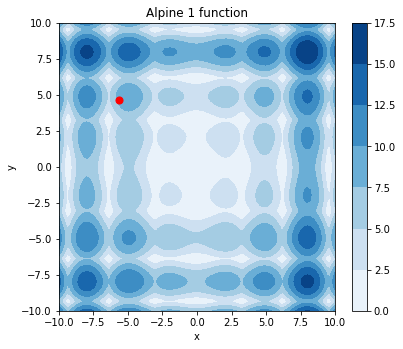

MovieWriter imagemagick unavailable; using Pillow instead.


In [7]:
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

'''

                              Example of TS 

'''

def alpine1(variables):
    '''
    Alpine 1 function
    Minimum at 0 at x = [zeros]
    Usually domain of evaluation is [-10, 10]
    Source: http://infinity77.net/global_optimization/test_functions_nd_A.html#n-d-test-functions-a
    Retrieved: 19/06/2018
    '''
    return np.sum(np.abs(np.multiply(variables, np.sin(variables)) + 0.1 * variables))

f = alpine1
b = (-10, 10)

max_iter = 10
max_iter_LS = 5
bounds=[b for i in range(2)]
radius = 0.5
reduce_iter = 100
reduce_frac = 0.8
max_tabu_size = 20
continuos_radius = [(0.01) for i in range(len(bounds))]


results = TS(f, max_iter, max_iter_LS, bounds, radius, reduce_iter, 
             reduce_frac, max_tabu_size, continuos_radius, p_init=None, traj=True)


#print('Best function value: ', results.f)
#print(' ')
#print('Best point: ', results.x)
#print(' ')
#print('Trajectory function values: ', results.traj_f)
#print(' ')
#print('Trajectory points: ', results.traj_x)
#print(' ')
#print('Trajectory function values summed up: ', results.traj_f_sum_up)
#print(' ')
#print('Trajectory points summed up: ', results.traj_x_sum_up)


# Plot Optimization
points             = np.zeros(1, dtype=[("position", float, 2)])
points["position"] = results.traj_x[0]

fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.15, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
start, stop, n_values = b[0], b[1], 100

x       = np.linspace(start, stop, n_values)
y       = np.linspace(start, stop, n_values)
X, Y    = np.meshgrid(x, y)

zs = np.array([f(np.array([x,y])) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z  = zs.reshape(X.shape)

cm = plt.contourf(X, Y, Z, cmap='Blues')
plt.colorbar(cm)
ax.set_title('Alpine 1 function')
ax.set_xlabel('x')
ax.set_ylabel('y')

scatter = ax.scatter(points["position"][:,0], points["position"][:,1], c='red', s=50)

xs = results.traj_x

def update(frame_number):
    points["position"] = xs[frame_number]
    ax.set_title('Alpine 1 function, Iteration: ' + str(frame_number))
    scatter.set_offsets(points["position"])
    return scatter, 

anim = FuncAnimation(fig, update, interval=0.1, frames=range(len(xs)), repeat_delay=2000)
plt.show()

# Save gif
anim.save('TS.gif', writer='imagemagick', fps=400)

# Metaheuristics applied

## Metaheuristic (Tabu, GA, SA) for Travelling Salesman Problem (TSP)
* https://github.com/CarlossShi/tsp-meta-heuristic


In [17]:
def get_cost(n, adj_mat, sol):
    """
    :param n: number of vertices, e.g. 2
    :param adj_mat: adjacency matrix, e.g. [[0,1], [1,0]]
    :param sol: solution, e.g. [1,0]
    """
    return sum([adj_mat[sol[_]][sol[(_ + 1) % n]] for _ in range(n)])


def get_delta_swap(n, adj_mat, sol, i, j):
    # bef: [..., i-1, i, i+1, ..., j-1, j, j+1] / [...,i-1, i, j, j+1, ...]
    # aft: [..., i-1, j, i+1, ..., j-1, i, j+1] / [...,i-1, j, i, j+1, ...]
    # the latter case, 2 * adj_mat(i, j) is extra deducted!
    delta = adj_mat[sol[i - 1]][sol[j]] + adj_mat[sol[j]][sol[(i + 1) % n]] + \
            adj_mat[sol[j - 1]][sol[i]] + adj_mat[sol[i]][sol[(j + 1) % n]] - \
            adj_mat[sol[i - 1]][sol[i]] - adj_mat[sol[i]][sol[(i + 1) % n]] - \
            adj_mat[sol[j - 1]][sol[j]] - adj_mat[sol[j]][sol[(j + 1) % n]]
    if j - i == 1 or i == 0 and j == n - 1:
        delta += 2 * adj_mat[sol[i]][sol[j]]  # symmetrical TSP
    return delta


def get_new_sol_swap(sol, i, j):
    new_sol = sol.copy()
    new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
    return new_sol


def get_delta_2opt(n, adj_mat, sol, i, j):
    # bef: [..., i-1, i, i+1, ..., j-1, j, j+1] / [...,i-1, i, j, j+1, ...] / [i, i+1, ..., j-1, j]
    # aft: [..., i-1, j, j-1, ..., i+1, i, j+1] / [...,i-1, j, i, j+1, ...] / [j, i+1, ..., j-1, i]
    # the latter case, 2 * adj_mat(i, j) is extra deducted!
    delta = adj_mat[sol[i - 1]][sol[j]] + adj_mat[sol[i]][sol[(j + 1) % n]] - \
            adj_mat[sol[i - 1]][sol[i]] - adj_mat[sol[j]][sol[(j + 1) % n]]
    if i == 0 and j == n - 1:  # the first two value == 0, while others < 0
        delta = 0
    return delta


def get_new_sol_2opt(sol, i, j):
    new_sol = sol.copy()
    new_sol[i:j+1] = new_sol[i:j+1][::-1]  # notice index + 1 !
    return new_sol

In [18]:
# tb.py
import random
import math
from collections import deque


def tnm_selection(n, adj_mat, sol, max_tnm, mut_md, tb_size, tb_list, fq_dict, best_cost):
    """
    :param n: number of vertices
    :param adj_mat: adjacency matrix
    :param sol: solution where the neighbours are chosen from
    :param max_tnm: how many candidates picked in tournament selection
    :param mut_md: [get_sol, get delta], method of mutation, e.g. swap, 2-opt
    :param tb_size: >=0, max length of tb_list
    :param tb_list: deque ,out <- [...] <- in
    :param fq_dict: visit times of vertex pair (not used!)
    :param best_cost: cost of the best solution
    """

    get_new_sol = mut_md[0]
    get_delta = mut_md[1]

    cost = get_cost(n, adj_mat, sol)

    best_delta_0 = math.inf
    best_i_0 = best_j_0 = -1

    best_delta_1 = math.inf
    best_i_1 = best_j_1 = -1
    for _ in range(max_tnm):
        i, j = random.sample(range(n), 2)  # randomly select two indexes
        i, j = (i, j) if i < j else (j, i)  # let i < j
        v_1, v_2 = (sol[i], sol[j]) if sol[i] < sol[j] else (
            sol[j], sol[i])  # v_1 < v_2 make indexing in tb_list and fq_dict convenient
        delta = get_delta(n, adj_mat, sol, i, j)
        if (v_1, v_2) not in tb_list:  # if not tabu
            if delta < best_delta_0:
                best_delta_0 = delta
                best_i_0 = i
                best_j_0 = j
        else:  # if tabu
            if delta < best_delta_1:
                best_delta_1 = delta
                best_i_1 = i
                best_j_1 = j
    if best_delta_1 < best_delta_0 and cost + best_delta_1 < best_cost:  # break the tabu
        v_1, v_2 = (sol[best_i_1], sol[best_j_1]) if sol[best_i_1] < sol[best_j_1] else (sol[best_j_1], sol[best_i_1])
        tb_list.remove((v_1, v_2))
        tb_list.append((v_1, v_2))  # move to the end of list
        fq_dict[(v_1, v_2)] = fq_dict.get((v_1, v_2), 0) + 1
        new_sol = get_new_sol(sol, best_i_1, best_j_1)
        new_cost = cost + best_delta_1
    else:  # do not break the tabu
        if tb_size > 0:
            v_1, v_2 = (sol[best_i_0], sol[best_j_0]) \
                if sol[best_i_0] < sol[best_j_0] \
                else (sol[best_j_0], sol[best_i_0])
            if len(tb_list) == tb_size:
                tb_list.popleft()
            tb_list.append((v_1, v_2))
            fq_dict[(v_1, v_2)] = fq_dict.get((v_1, v_2), 0) + 1
        new_sol = get_new_sol(sol, best_i_0, best_j_0)
        new_cost = cost + best_delta_0
    # assert abs(new_cost - get_cost(n, adj_mat, new_sol)) < 1e-9, 'new_sol does not match new_cost'
    return new_sol, new_cost, tb_list, fq_dict


def tb(n, adj_mat, tb_size, max_tnm, mut_md, term_count):
    """
    :param n: number of vertices
    :param adj_mat: adjacency matrix
    :param tb_size: tabu solutions in tb_list
    :param max_tnm: how many candidates picked in tournament selection
    :param mut_md: [get_sol, get delta], method of mutation, e.g. swap, 2-opt
    :param term_count: termination flag
    """
    # initialization
    sol = list(range(n))
    random.shuffle(sol)  # e.g. [0,1,...,n]
    tb_list = deque([])
    fq_dict = {}
    best_sol = sol.copy()
    best_cost = get_cost(n, adj_mat, sol)
    data = {'cost': deque([]), 'best_cost': deque([])}
    count = 0
    while True:
        sol, cost, tb_list, fq_dict = tnm_selection(n, adj_mat, sol,
                                                    max_tnm, mut_md, tb_size,
                                                    tb_list, fq_dict, best_cost)
        # mention the iteratively variable 'sol'!
        if cost < best_cost:
            best_sol = sol
            best_cost = cost
            count = 0
        else:
            count += 1
        data['cost'].append(cost)
        data['best_cost'].append(best_cost)
        if count > term_count:
            break
    data['fq_dict'] = fq_dict
    return best_sol, best_cost, data

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.51it/s]


{'avg_cost': 6720.299913800476,
 'avg_gap': 0.009138995064872812,
 'avg_time': 0.2818932580947876,
 'best_cost': 6659.431532931463,
 'best_gap': -1.1709231424461564e-06,
 'best_sol': [8,
              7,
              6,
              5,
              4,
              2,
              3,
              1,
              0,
              9,
              13,
              20,
              28,
              29,
              31,
              34,
              36,
              37,
              32,
              33,
              35,
              30,
              26,
              27,
              23,
              21,
              24,
              25,
              22,
              19,
              14,
              12,
              15,
              16,
              17,
              18,
              10,
              11],
 'cost': [6813.889279932043,
          6730.0924184942805,
          6713.253765802071,
          6663.734223656006,
          6685.399053012221,
         

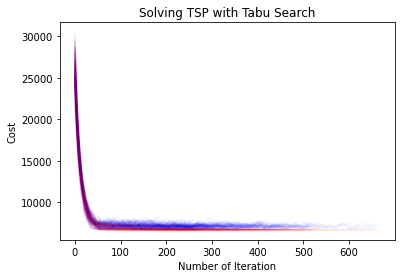

In [22]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.animation as animation
import numpy as np
from pprint import pprint
import time
import math
from tqdm import tqdm

#from tsp import *
#import tb
#import ga
#import sa

import os
if not os.path.exists('results'):
    os.makedirs('results')

# =============================================================================
# load data
# =============================================================================
pos = [[float(x) for x in s.split()[1:]] for s in open('example_data/tabu_data.txt').readlines()]
n = len(pos)

# =============================================================================
# calculate adjacency matrix
# =============================================================================
adj_mat = np.zeros([n, n])
for i in range(n):
    for j in range(i, n):
        adj_mat[i][j] = adj_mat[j][i] = np.linalg.norm(np.subtract(pos[i], pos[j]))

# =============================================================================
# initialization
# =============================================================================
opt_cost = 6659.439330623091  # get result from tsp_gurobi.py
num_tests = 100  # number of iid tests
result = {'best_sol': [], 'best_cost': math.inf, 'best_gap': math.inf,
          'cost': [0] * num_tests, 'time': [0] * num_tests,
          'avg_cost': math.inf, 'avg_gap': math.inf, 'cost_std': math.inf,
          'avg_time': math.inf, 'time_std': math.inf}
best_cost = math.inf
best_sol = []
data = {}

# =============================================================================
# set method
# =============================================================================
method = 'ts'  # tabu search
# method = 'ga'  # genetic algorithm
# method = 'sa'  # simulated annealing

# =============================================================================
# set mutation method
# =============================================================================
# mut_md = [get_new_sol_swap, get_delta_swap]
mut_md = [get_new_sol_2opt, get_delta_2opt]

# =============================================================================
# run and visualization
# =============================================================================
method_name = ''
for _ in tqdm(range(num_tests)):
    start = time.time()
    if method == 'ts':
        method_name = 'Tabu Search'
        best_sol, best_cost, data = tb(n, adj_mat,
                                          tb_size=20,  # tabu solutions in tb_list
                                          max_tnm=100,  # how many candidates picked in tournament selection
                                          mut_md=mut_md,  # [get_sol, get delta], method of mutation, e.g. swap, 2-opt
                                          term_count=200  # terminate threshold if best_cost nor change
                                          )
    elif method == 'ga':
        method_name = 'Genetic Algorithm'
        best_sol, best_cost, data = ga(n, adj_mat,
                                          n_pop=200,
                                          r_cross=0.5,
                                          r_mut=0.8,
                                          selection_md='tnm',  # 'rw' / 'tnm' / 'elt'
                                          max_tnm=3,
                                          term_count=200
                                          )
    elif method == 'sa':
        method_name = 'Simulated Annealing'
        best_sol, best_cost, data = sa(n, adj_mat,
                                          tb_size=0,  # tabu solutions in tb_list
                                          max_tnm=20,  # how many candidates picked in tournament selection
                                          mut_md=mut_md,  # [get_sol, get delta], method of mutation, e.g. swap, 2-opt
                                          term_count_1=25,  # inner loop termination flag
                                          term_count_2=25,  # outer loop termination flag
                                          t_0=1200,  # starting temperature, calculated by init_temp.py
                                          alpha=0.9  # cooling parameter
                                          )
    else:
        assert 0, 'unknown method'
    end = time.time()
    result['time'][_] = end - start
    result['cost'][_] = best_cost
    if best_cost < result['best_cost']:
        result['best_sol'] = best_sol
        result['best_cost'] = best_cost
        result['best_gap'] = best_cost / opt_cost - 1
    plt.plot(range(len(data['cost'])), data['cost'], color='b', alpha=math.pow(num_tests, -0.75))
    plt.plot(range(len(data['cost'])), data['best_cost'], color='r', alpha=math.pow(num_tests, -0.75))


plt.title('Solving TSP with {}'.format(method_name))
plt.xlabel('Number of Iteration')
plt.ylabel('Cost')
plt.savefig('results/{}.png'.format(method))

# print results
result['avg_cost'] = np.mean(result['cost'])
result['avg_gap'] = result['avg_cost'] / opt_cost - 1
result['cost_std'] = np.std(result['cost'])
result['avg_time'] = np.mean(result['time'])
result['time_std'] = np.std(result['time'])
pprint(result)


# =============================================================================
# SA visualization 
# https://matplotlib.org/stable/gallery/animation/dynamic_image.html
# https://stackoverflow.com/questions/49158604/matplotlib-animation-update-title-using-artistanimation
# https://stackoverflow.com/questions/17895698/updating-the-x-axis-values-using-matplotlib-animation
# =============================================================================
if num_tests == 1 and method == 'simulated annealing':
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    plt.subplots_adjust(wspace=0.3)  # more interval between two axes

    xlim = [np.min(pos, 0)[0], np.max(pos, 0)[0]]
    ylim = [np.min(pos, 0)[1], np.max(pos, 0)[1]]
    ax[0].set(xlabel='X Axis', ylabel='Y Axis',
              xlim=xlim, ylim=ylim,
              title='Current and Optimal Tours')
    ax[1].set(xlabel='Number of Iteration', ylabel='Tour Length',
              title='Convergence Curve')
    ims = []
    for i in range(len(data['sol'])):
        im = []
        sol = data['sol'][i]
        best_sol = data['best_sol'][i]
        cost = list(data['cost'])[:i]
        best_cost = list(data['best_cost'])[:i]

        if i > 2 and cost[-1] == cost[-2]:
            continue

        # https://matplotlib.org/stable/gallery/shapes_and_collections/line_collection.html
        lines = [[pos[sol[_]], pos[sol[(_ + 1) % n]]] for _ in range(n)]
        line_segments = LineCollection(lines, color='b')
        im.append(ax[0].add_collection(line_segments))
        lines = [[pos[best_sol[_]], pos[best_sol[(_ + 1) % n]]] for _ in range(n)]
        line_segments = LineCollection(lines, color='r', alpha=0.5, linewidth=2)
        im.append(ax[0].add_collection(line_segments))

        # # plot directed tour, too slow
        # # https://stackoverflow.com/questions/46506375/creating-graphics-for-euclidean-instances-of-tsp
        # for j in range(n):
        #     start_pos = pos[sol[j]]
        #     end_pos = pos[sol[(j + 1) % n]]
        #     im.append(ax[0].annotate("",
        #                  xy=start_pos, xycoords='data',
        #                  xytext=end_pos, textcoords='data',
        #                  arrowprops=dict(arrowstyle='->',
        #                                  connectionstyle='arc3',
        #                                  alpha=1,
        #                                  color='b')))
        # for j in range(n):
        #     start_pos = pos[best_sol[j]]
        #     end_pos = pos[best_sol[(j + 1) % n]]
        #     im.append(ax[0].annotate("",
        #                  xy=start_pos, xycoords='data',
        #                  xytext=end_pos, textcoords='data',
        #                  arrowprops=dict(arrowstyle='->',
        #                                  connectionstyle='arc3',
        #                                  lw=2,
        #                                  alpha=0.5,
        #                                  color='r')))

        line1, = ax[1].plot(range(len(cost)), cost, color='b')
        line2, = ax[1].plot(range(len(best_cost)), best_cost, color='r')
        im.append(line1)
        im.append(line2)
        ims.append(im)

    ani = animation.ArtistAnimation(fig, ims, interval=10, blit=True,
                                    repeat_delay=1000)
    ani.save('results/sa.mp4')

## Metaheuristic (Tabu) for Graph Colouring
* https://github.com/kvnthomas98/tabu-search-graph-coloring/blob/master/tabucol.py

5 -> 4
4 -> 3
3 -> 2
2 -> 1
1 -> 0
Found coloring:
 {0: 3, 1: 2, 2: 3, 3: 2, 4: 0, 5: 3, 6: 1, 7: 3, 8: 1, 9: 1, 10: 2, 11: 2}


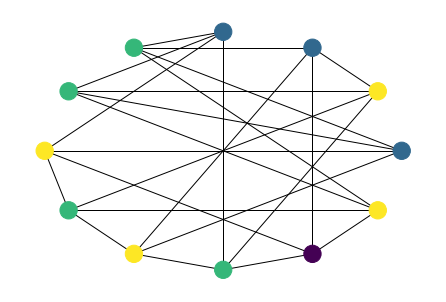

In [4]:
from collections import deque
from random import randrange

def tabucol(graph, number_of_colors, tabu_size=7, reps=100, max_iterations=10000, debug=False):
    # graph is assumed to be the adjacency matrix of an undirected graph with no self-loops
    # nodes are represented with indices, [0, 1, ..., n-1]
    # colors are represented by numbers, [0, 1, ..., k-1]
    colors = list(range(number_of_colors))
    # number of iterations of the tabucol algorithm
    iterations = 0
    # initialize tabu as empty queue
    tabu = deque()
    
    # solution is a map of nodes to colors
    # Generate a random solution:
    solution = dict()
    for i in range(len(graph)):
        solution[i] = colors[randrange(0, len(colors))]

    # Aspiration level A(z), represented by a mapping: f(s) -> best f(s') seen so far
    aspiration_level = dict()

    while iterations < max_iterations:
        # Count node pairs (i,j) which are adjacent and have the same color.
        move_candidates = set()  # use a set to avoid duplicates
        conflict_count = 0
        for i in range(len(graph)):
            for j in range(i+1, len(graph)):  # assume undirected graph, ignoring self-loops
                if graph[i][j] > 0: # adjacent
                    if solution[i] == solution[j]:  # same color
                        move_candidates.add(i)
                        move_candidates.add(j)
                        conflict_count += 1
        move_candidates = list(move_candidates)  # convert to list for array indexing

        if conflict_count == 0:
            # Found a valid coloring.
            break

        # Generate neighbor solutions.
        new_solution = None
        for r in range(reps):
            # Choose a node to move.
            node = move_candidates[randrange(0, len(move_candidates))]
            
            # Choose color other than current.
            new_color = colors[randrange(0, len(colors) - 1)]
            if solution[node] == new_color:
                # essentially swapping last color with current color for this calculation
                new_color = colors[-1]

            # Create a neighbor solution
            new_solution = solution.copy()
            new_solution[node] = new_color
            # Count adjacent pairs with the same color in the new solution.
            new_conflicts = 0
            for i in range(len(graph)):
                for j in range(i+1, len(graph)):
                    if graph[i][j] > 0 and new_solution[i] == new_solution[j]:
                        new_conflicts += 1
            if new_conflicts < conflict_count:  # found an improved solution
                # if f(s') <= A(f(s)) [where A(z) defaults to z - 1]
                if new_conflicts <= aspiration_level.setdefault(conflict_count, conflict_count - 1):
                    # set A(f(s) = f(s') - 1
                    aspiration_level[conflict_count] = new_conflicts - 1

                    if (node, new_color) in tabu: # permit tabu move if it is better any prior
                        tabu.remove((node, new_color))
                        if debug:
                            print("tabu permitted;", conflict_count, "->", new_conflicts)
                        break
                else:
                    if (node, new_color) in tabu:
                        # tabu move isn't good enough
                        continue
                if debug:
                    print (conflict_count, "->", new_conflicts)
                break

        # At this point, either found a better solution,
        # or ran out of reps, using the last solution generated
        
        # The current node color will become tabu.
        # add to the end of the tabu queue
        tabu.append((node, solution[node]))
        if len(tabu) > tabu_size:  # queue full
            tabu.popleft()  # remove the oldest move

        # Move to next iteration of tabucol with new solution
        solution = new_solution
        iterations += 1
        if debug and iterations % 500 == 0:
            print("iteration:", iterations)

    #print("Aspiration Levels:\n" + "\n".join([str((k,v)) for k,v in aspiration_level.items() if k-v > 1]))

    # At this point, either conflict_count is 0 and a coloring was found,
    # or ran out of iterations with no valid coloring.
    if conflict_count != 0:
        print("No coloring found with {} colors.".format(number_of_colors))
        return None
    else:
        print("Found coloring:\n", solution)
        return solution

try:
    import matplotlib.pyplot as plt
    import networkx as nx

    def load_testcase(file):
        graph = nx.Graph()
        with open(file, 'r') as f:
            for line in f.readlines():
                line = line.strip()
                if not line:
                    continue
                words = line.split()
                if words[0] == 'p':
                    assert words[1] == 'edge'
                    vertices = int(words[2])
                    graph.add_nodes_from(range(vertices))
                if words[0] == 'e':
                    graph.add_edge(int(words[1]) - 1, int(words[2]) - 1)
        return graph
                
    def test(nx_graph, k, draw=False):
        graph = nx.to_numpy_matrix(nx_graph).astype(int).tolist()
        coloring = tabucol(graph, k, debug=True)
        if draw:
            values = [coloring[node] for node in nx_graph]
            nx.draw(nx_graph, node_color=values, pos=nx.shell_layout(nx_graph))
            plt.show()
except ImportError:
    print("Need networkx and matplotlib installed for testing.")


graph = [[0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
         [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
         [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
         [0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0],
         [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
         [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
         [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
         [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
         [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0],
         [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
         [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]]

test(nx.chvatal_graph(), 4, True)

# Tabu search (Java) for graph drawing
* https://github.com/scaverod/SOS-TS-GraphDrawing

# Sugiyama 


Sugiyama with Grandalf
* https://github.com/bdcht/grandalf

In [3]:
from grandalf.graphs import Vertex,Edge,Graph,graph_core
from grandalf.layouts import SugiyamaLayout

V = [Vertex(data) for data in range(10)]
X = [(0,1),(0,2),(1,3),(2,3),(4,0),(1,4),(4,5),(5,6),(3,6),(3,7),(6,8), (7,8),(8,9),(5,9)]
E = [Edge(V[v],V[w]) for (v,w) in X]
g = Graph(V,E)
g.C

print([v.data for v in g.path(V[1],V[9])])

g.add_edge(Edge(V[9],Vertex(10)))
#<grandalf.graphs.Edge object at 0x7fb23a95e3a0>
g.remove_edge(V[5].e_to(V[9]))
#<grandalf.graphs.Edge object at 0x7fb23a95e0a0>
print([v.data for v in g.path(V[1],V[9])])
#[1, 3, 6, 8, 9]
g.remove_vertex(V[8])
#<grandalf.graphs.Vertex object at 0x7fb23a933dc0>
len(g.C)
#2
print(g.path(V[1],V[9]))
#None
for e in g.C[1].E(): print("%s -> %s"%(e.v[0].data,e.v[1].data))
#...
#9 -> 10

class defaultview(object):
    w,h = 10,10
    
for v in V: v.view = defaultview()

sug = SugiyamaLayout(g.C[0])
sug.init_all(roots=[V[0]],inverted_edges=[V[4].e_to(V[0])])
sug.draw()
for v in g.C[0].sV: print("%s: (%d,%d)"%(v.data,v.view.xy[0],v.view.xy[1]))

for l in sug.layers:
    for n in l: print(n.view.xy,end='')
    print('')

for e,d in sug.ctrls.items():
    print('long edge %s --> %s points:'%(e.v[0].data,e.v[1].data))
    for r,v in d.items(): print("%s %s %s"%(v.view.xy,'at rank',r))
    

[1, 4, 5, 9]
[1, 3, 6, 8, 9]
None
9 -> 10
4: (30,65)
2: (-30,35)
0: (0,5)
1: (15,35)
3: (-15,65)
5: (30,95)
6: (15,125)
7: (-30,95)
(0.0, 5.0)
(-30.0, 35.0)(15.0, 35.0)(45.0, 35.0)
(-15.0, 65.0)(30.0, 65.0)
(-30.0, 95.0)(0.0, 95.0)(30.0, 95.0)
(15.0, 125.0)
long edge 3 --> 6 points:
(-15.0, 65.0) at rank 2
(15.0, 125.0) at rank 4
(0.0, 95.0) at rank 3
long edge 4 --> 0 points:
(0.0, 5.0) at rank 0
(30.0, 65.0) at rank 2
(45.0, 35.0) at rank 1


# Gurobi solver

## Gurobi Optimizer for Python 
* mathematical model implemented to solve the problem with an exact commercial optimization software (Gurobi)